## Project Week8 Markov chain - Exploratory Data Analysis

* We have anonymously tracked the movement of all DOODL customers during a five-day week. 
* In the following files you find tabular data indicating where customers spent their time. 

Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:
1. Calculate the total number of customers in each section
2. Calculate the total number of customers in each section over time \
   Display the number of customers at checkout over time
3. Calculate the time each customer spent in the market
4. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).
5. Find out what the revenues per section are, which is the most profitable section
6. calculate transition probability matrix

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [257]:
def day_processing(df):
    """
    generates pandas datetime information and splits column into hour, day, date
    """
    df['datetime'] = pd.to_datetime(df['timestamp'])
    df['time'] = df['datetime'].dt.time
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.weekday
    df['date'] = df['datetime'].dt.date
    df.set_index('datetime', inplace=True)
    return day

In [255]:
def fill_minutes(df):
    """
    generates a minute-wise information for all customers and also their order of visits
    """
    df = df.groupby('customer_no').resample('1T').ffill()
    df.drop(columns = 'customer_no', inplace = True)
    df.reset_index(inplace = True)
    df['before'] = df.groupby(['customer_no'])['location'].shift(1)
    return df

In [256]:
mon = pd.read_csv('data/monday.csv', sep=';', parse_dates=True)
tue = pd.read_csv('data/tuesday.csv', sep=';', parse_dates=True)
wed = pd.read_csv('data/wednesday.csv', sep=';', parse_dates=True)
thu = pd.read_csv('data/thursday.csv', sep=';', parse_dates=True)
fri = pd.read_csv('data/friday.csv', sep=';', parse_dates=True)

In [258]:
days = [mon, tue, wed, thu, fri]

In [259]:
for day in days:
    day_processing(day)

In [261]:
# One complete dataframe:
df = pd.concat(days)

,timestamp,customer_no,location,time,hour,day,date
datetime,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,07:04:00,7,0,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,07:04:00,7,0,2019-09-02


## 1. Calculate the total number of customers in each section

Text(0.5, 1.0, 'Daily average of customers in each section')

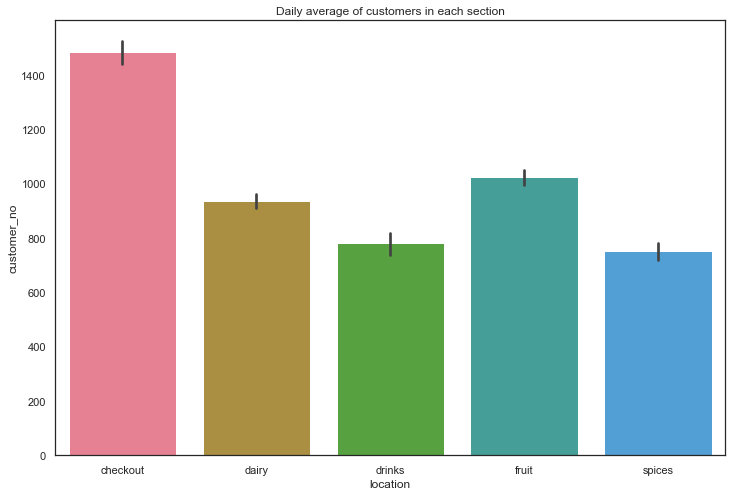

In [262]:
plt.figure(figsize=(12,8))
total_cust = pd.DataFrame(df.groupby(['location', 'date']).count()['customer_no'])
total_cust.reset_index(inplace = True)
sns.barplot(data = total_cust, x = 'location', y = 'customer_no')
plt.title('Daily average of customers in each section')

## 2. Calculate the total number of customers in each section over time

In [71]:
customers_over_time = pd.DataFrame(df.groupby(['location','hour'])['customer_no'].count())
customers_over_time.fillna(0, inplace=True)
customers_over_time = pd.DataFrame(customers_over_time)
customers_over_time.reset_index(inplace=True)

Text(0.5, 1.0, 'customer distribution throughout the day')

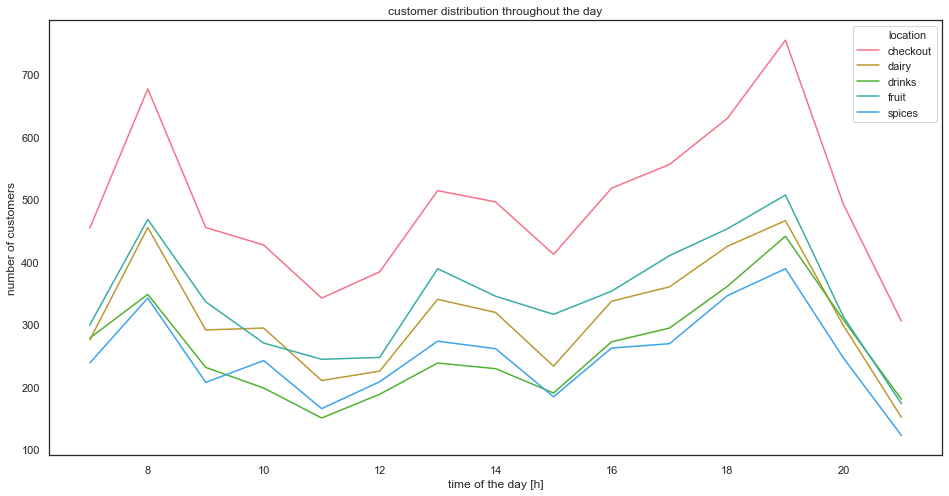

In [73]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', hue='location', data=customers_over_time)
ax.set(xlabel='time of the day [h]', ylabel='number of customers')
plt.title('customer distribution throughout the day')

## 3. Calculate the time each customer spent in the market

In [287]:
df.reset_index(inplace = True)

In [294]:
shopping_time = pd.DataFrame((df.groupby(['day', 'customer_no'])['datetime'].max())-(df.groupby(['day','customer_no'])['datetime'].min()))
shopping_time.reset_index(inplace=True)
shopping_time = shopping_time[shopping_time.datetime != '00:00:00']

,day,customer_no,datetime
0,0,1,00:02:00
1,0,2,00:03:00


In [297]:
average_shopping_time = shopping_time['datetime'].mean()
print(f' the average shopping time in the market is {average_shopping_time}')

 the average shopping time in the market is 0 days 00:06:14.862829


Text(0.5, 1.0, 'shopping time in minutes')

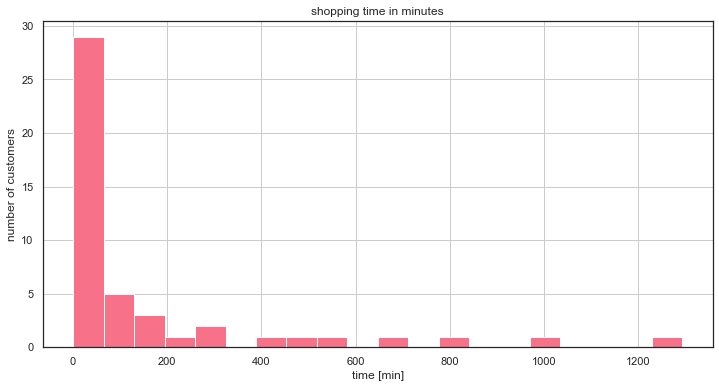

In [298]:
plt.figure(figsize=(12,6))
shopping_time['datetime'].value_counts().hist(bins = 20)
plt.xlabel('time [min]')
plt.ylabel('number of customers')
plt.title('shopping time in minutes')

[(-1, 1500)]

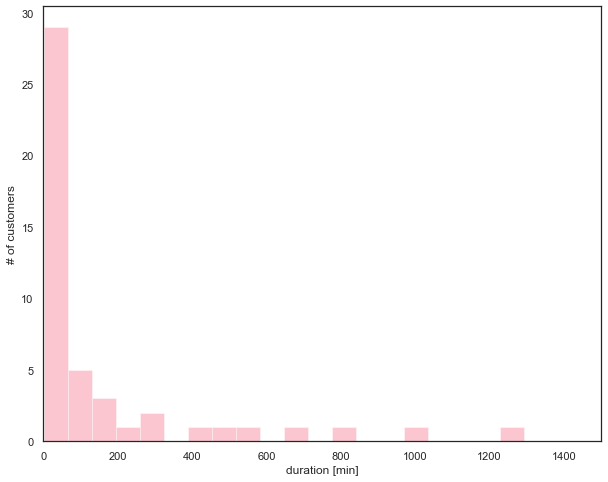

In [25]:
# Histogram using seaborn:
plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.set(style='white', palette='husl')
ax = sns.distplot(cust_present['customer_no'], hist=True, bins=20, kde=False) #kernel density estimation
ax.set(xlabel='duration [min]', ylabel='# of customers')
ax.set(xlim=(-1, 1500))

## 4. Analyze if the first section that customers visit follows a different pattern than the following ones -> do customers spend more time in the first section they visit?

* Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [299]:
mon = fill_minutes(mon)
tue = fill_minutes(tue)
wed = fill_minutes(wed)
thu = fill_minutes(thu)
fri = fill_minutes(fri)

In [327]:
days = [mon, tue, wed, thu, fri]
df2 = pd.concat(days)

Text(0.5, 1.0, 'time spend in different locations, depending on previous location')

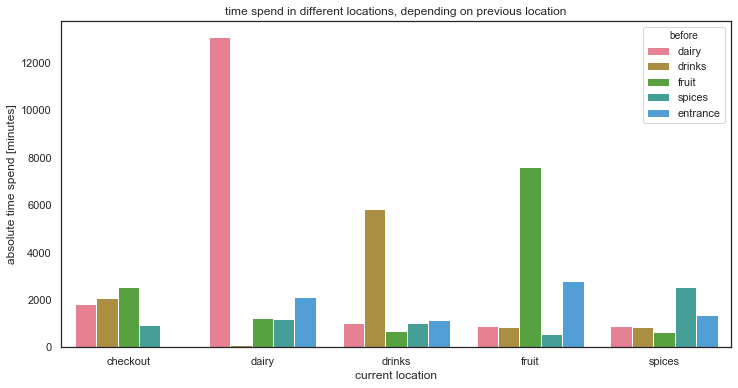

In [349]:
plt.figure(figsize = (12,6))
locations = df2.fillna('entrance').groupby(['location', 'before'])[['time']].count() #number of rows = minutes
locations.reset_index(inplace = True)
sns.barplot(x = 'location', y = 'time', hue = 'before', data = locations)
plt.ylabel('absolute time spend [minutes]')
plt.xlabel('current location')
plt.title('time spend in different locations, depending on previous location')

## 5. Estimate the revenue: which is the most profitable section?

In [49]:
#revenue/minute in euros:

revenue = {'fruit':4, 'spices':3, 'dairy':5, 'drinks':6}

In [50]:
arrival2 = pd.DataFrame(df.groupby(['day', 'location', 'customer_no'])['timestamp'].min())
departure2 = pd.DataFrame(df.groupby(['day', 'location', 'customer_no'])['timestamp'].max())

In [51]:
shopping_time2 = pd.DataFrame(departure2['timestamp'] - arrival2['timestamp'])
shopping_time2.reset_index(inplace=True)
shopping_time2 = shopping_time2[shopping_time2.timestamp != '00:00:00']
shopping_time2.tail(10)

,day,location,customer_no,timestamp
21618,4,spices,1372,00:17:00
21633,4,spices,1399,00:11:00
21635,4,spices,1404,00:10:00
21640,4,spices,1420,00:11:00
21643,4,spices,1429,00:05:00
21646,4,spices,1435,00:14:00
21657,4,spices,1456,00:06:00
21660,4,spices,1464,00:06:00
21663,4,spices,1472,00:03:00
21664,4,spices,1477,00:04:00


In [52]:
shopping_time2.sort_values(by=['location'])
shopping_time2

,day,location,customer_no,timestamp
1441,0,dairy,6,00:21:00
1443,0,dairy,13,00:08:00
1451,0,dairy,33,00:03:00
1458,0,dairy,42,00:07:00
1459,0,dairy,43,00:13:00
...,...,...,...,...
21646,4,spices,1435,00:14:00
21657,4,spices,1456,00:06:00
21660,4,spices,1464,00:06:00
21663,4,spices,1472,00:03:00


In [53]:
shopping_time2['location'].unique()

array(['dairy', 'drinks', 'fruit', 'spices'], dtype=object)

In [54]:
shopping_time3 = pd.DataFrame(shopping_time2.groupby(['day','location'])['timestamp'].sum())
shopping_time3

timestamp
day location          
0   dairy     22:54:00
    drinks    14:28:00
    fruit     21:16:00
    spices    17:51:00
1   dairy     18:18:00
    drinks    12:08:00
    fruit     17:27:00
    spices    15:17:00
2   dairy     20:24:00
    drinks    11:43:00
    fruit     19:16:00
    spices    17:39:00
3   dairy     23:37:00
    drinks    16:03:00
    fruit     21:23:00
    spices    21:11:00
4   dairy     21:49:00
    drinks    14:26:00
    fruit     23:02:00
    spices    15:45:00

In [55]:
#shopping_time3 = shopping_time3.stack('day')
shopping_time3 = shopping_time3.unstack('day')
shopping_time3.head()

timestamp                                    
day              0        1        2        3        4
location                                              
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00

In [56]:
shopping_time3['mean'] = shopping_time3.mean(axis=1)
shopping_time3.head()

timestamp                                         mean
day              0        1        2        3        4         
location                                                       
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00 21:24:24
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00 13:45:36
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00 20:28:48
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00 17:32:36

In [57]:
shopping_time3['mean'] = shopping_time3['mean'].dt.seconds.div(60).astype(int)
shopping_time3

timestamp                                      mean
day              0        1        2        3        4      
location                                                    
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052

In [58]:
shopping_time3['revenue'] = shopping_time3.index.map(revenue)
shopping_time3.head()

timestamp                                      mean revenue
day              0        1        2        3        4              
location                                                            
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284       5
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3

In [59]:
shopping_time3['total_revenue'] = shopping_time3['mean'] * shopping_time3['revenue']
shopping_time3

timestamp                                      mean revenue  \
day              0        1        2        3        4                 
location                                                               
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284       5   
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6   
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4   
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3   

         total_revenue  
day                     
location                
dairy             6420  
drinks            4950  
fruit             4912  
spices            3156

In [60]:
shopping_time3.tail(3)

timestamp                                      mean revenue  \
day              0        1        2        3        4                 
location                                                               
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6   
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4   
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3   

         total_revenue  
day                     
location                
drinks            4950  
fruit             4912  
spices            3156

[Text(0, 0.5, 'revenue per week [€]'), Text(0.5, 0, 'supermarket section')]

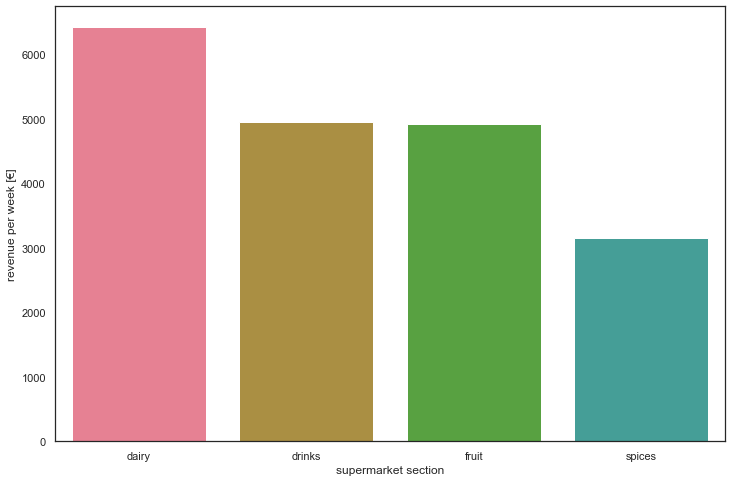

In [61]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.barplot(x=shopping_time3.index, y=shopping_time3['total_revenue'], data=shopping_time3)
ax.set(xlabel='supermarket section', ylabel='revenue per week [€]')

## 6. Calculate the transition probability matrix:

In [65]:
df2.shape

(53903, 8)

In [397]:
df3 = df2.fillna('Entrance')

In [393]:
(df3['before'] + '->' + df3['location']).value_counts()

dairy->dairy        13095
fruit->fruit         7586
drinks->drinks       5821
Entrance->fruit      2810
fruit->checkout      2555
spices->spices       2524
Entrance->dairy      2141
drinks->checkout     2096
dairy->checkout      1825
Entrance->spices     1351
fruit->dairy         1219
spices->dairy        1213
Entrance->drinks     1143
dairy->drinks        1041
spices->drinks       1024
spices->checkout      941
dairy->spices         913
dairy->fruit          886
drinks->fruit         855
drinks->spices        846
fruit->drinks         697
fruit->spices         644
spices->fruit         571
drinks->dairy         106
dtype: int64

In [399]:
P = pd.crosstab(df3['location'], df3[ 'before'], normalize = 0)
P

before,Entrance,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.246056,0.282594,0.344479,0.126871
dairy,0.120457,0.736750,0.005964,0.068583,0.068246
drinks,0.117520,0.107033,0.598499,0.071664,0.105285
fruit,0.221121,0.069720,0.067280,0.596947,0.044932
spices,0.215196,0.145428,0.134756,0.102580,0.402039
